In [1]:
import pandas as pd

In [2]:
songs = pd.read_csv("Data/audio_features3.csv")

In [3]:
cluster_df = songs.drop(["Unnamed: 0", "artist", "album", "track_name", "track_id"], axis=1)

In [4]:
songs.head()

,Unnamed: 0,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,MEDUZA,Paradise,Paradise (feat. Dermot Kennedy),6ft4hAq6yde8jPZY2i5zLr,0.632,0.595,8,-7.644,0,0.0401,0.000000,0.2090,0.435,124.114,167903,4
1,1,Ariana Grande,Positions,motive (with Doja Cat),5GkQIP5mWPi4KZLLXeuFTT,0.789,0.742,10,-5.664,0,0.0652,0.000000,0.1660,0.661,116.965,167990,4
2,2,Shawn Mendes,Wonder,Wonder,5KCbr5ndeby4y4ggthdiAb,0.333,0.637,1,-4.904,0,0.0581,0.000018,0.1490,0.132,139.898,172693,4
3,3,The Weeknd,In Your Eyes (Remix),In Your Eyes (feat. Kenny G) - Remix,1SySkCqhEG6Z68o2n07Bsr,0.606,0.786,7,-3.854,0,0.0366,0.000095,0.0725,0.525,99.969,256551,4
4,4,Fleetwood Mac,Rumours (Super Deluxe),Dreams - 2004 Remaster,0ofHAoxe9vBkTCp2UQIavz,0.828,0.492,0,-9.744,1,0.0276,0.004280,0.1280,0.789,120.151,257800,4


In [5]:
from sklearn.preprocessing import StandardScaler

FIT / TRANSFORM

In [6]:
std_scaler = StandardScaler()

In [7]:
scaled_df = std_scaler.fit_transform(cluster_df)
[list(pd.DataFrame(scaled_df).loc[0])]

[[0.24105061405984846,
  0.1882609224401516,
  0.7749650159405277,
  0.2526828423600446,
  -1.4653032430322974,
  -0.4391244841321525,
  -0.4024133902377566,
  0.2633685105135327,
  -0.24543821333219132,
  0.17221038120655255,
  -0.6144124658790927,
  0.21823153267662962]]

In [8]:
from sklearn.cluster import KMeans

In [9]:
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(scaled_df)
X = scaled_df

In [10]:
songs["cluster"] = kmeans.predict(scaled_df)

In [11]:
songs = songs.drop(["Unnamed: 0"], axis=1)

In [12]:
songs.to_csv("Data/songs_clusters.csv")

In [450]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [451]:
    KMeans(n_clusters=8,
                init="random",
                n_init=10,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=30,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans.fit(X)
print(kmeans.inertia_)

35547.15970028072


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

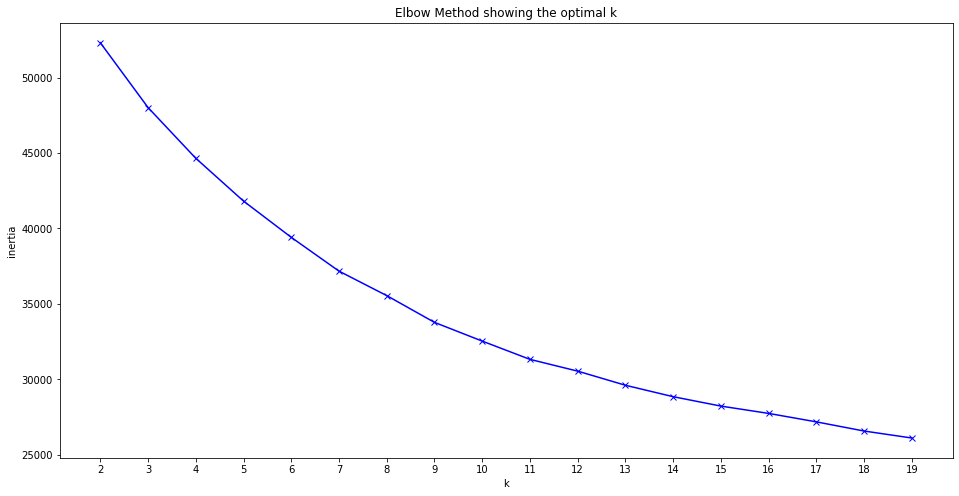

In [200]:
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

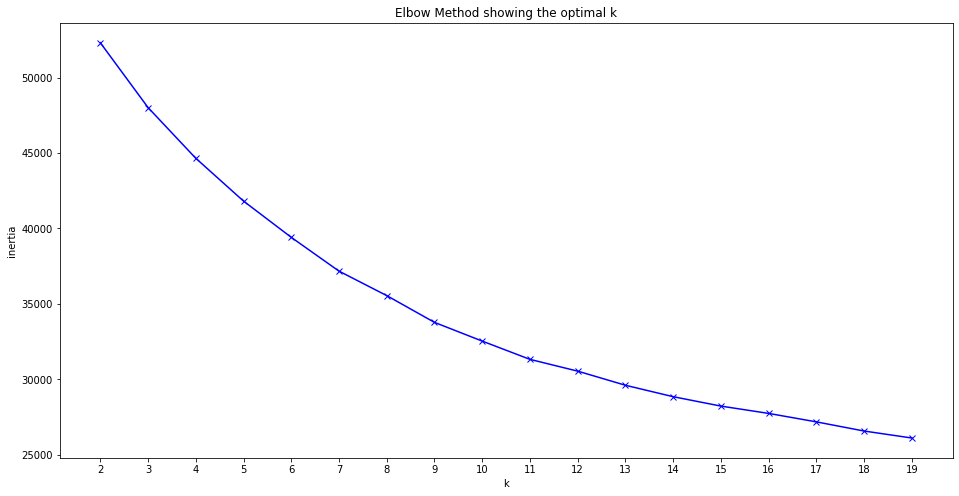

In [201]:
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

*APP*

In [13]:
from bs4 import BeautifulSoup

In [14]:
import requests
import pandas as pd
import random
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(
    client_id="aac1ac9a179f4d02b944ef2bd3ec22ee",
    client_secret="6c4b68aad01b4201affc7d7a2d4cbe11"))

In [15]:
cluster1 = pd.read_csv("Data/cluster_1.csv")
cluster2 = pd.read_csv("Data/cluster_2.csv")
cluster3 = pd.read_csv("Data/cluster_3.csv")
cluster4 = pd.read_csv("Data/cluster_4.csv")
cluster5 = pd.read_csv("Data/cluster_5.csv")
cluster6 = pd.read_csv("Data/cluster_6.csv")
cluster7 = pd.read_csv("Data/cluster_7.csv")
cluster8 = pd.read_csv("Data/cluster_8.csv")

In [16]:
def create_soup(html):
    url = html
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    return soup
soup = create_soup("https://www.billboard.com/charts/hot-100")

In [17]:
def create_list(part_html, soup):
    list_name = []
    for element in soup.select(part_html):
        list_name.append(element.get_text())
    return list_name
songs = create_list(".chart-element__information__song", soup)
artists = create_list(".chart-element__information__artist", soup)
rankLW = create_list("span.chart-element__meta.text--center.color--secondary.text--last", soup)
peaks = create_list("span.chart-element__meta.text--center.color--secondary.text--peak", soup)
wocs = create_list("span.chart-element__meta.text--center.color--secondary.text--week", soup)

In [18]:
dftop100 = pd.DataFrame({
    "Song": songs,
    "Artist": artists,
    "Rank Last Week": rankLW,
    "Peak": peaks,
    "Weeks on Chart": wocs})

In [19]:
low_top100 = []

for song in songs:
    low_top100.append(song.lower())

In [20]:
def spotify_function():
    input_song = str(input("Choose a song: ")).lower()
    if input_song not in low_top100:
        not_100 = spotify.search(q=input_song, limit = 1)
    #get features + add to datafram
        features = spotify.audio_features(not_100["tracks"]["items"][0]["uri"])
        features_df = pd.DataFrame(features)
        features_n = features_df.drop(["type","id","uri","track_href","analysis_url"], axis=1)
    
    #scale dataframe
        scaled_input = std_scaler.transform(features_n.drop(["acousticness"], axis=1))
        prediction = kmeans.predict(scaled_input)
        features = spotify.audio_features(not_100["tracks"]["items"][0]["uri"])
        features_df = pd.DataFrame(features)
        features_n = features_df.drop(["type","id","uri","track_href","analysis_url"], axis=1)
        #scale dataframe
        scaled_input = std_scaler.transform(features_n.drop(["acousticness"], axis=1))
        prediction = kmeans.predict(scaled_input)
        cluster = prediction[0]
        if cluster == 1:
            return cluster1[["artist", "track_name"]].sample()
        elif cluster == 2:
            return cluster2[["artist", "track_name"]].sample()
        elif cluster == 3:
            return cluster3[["artist", "track_name"]].sample()
        elif cluster == 4:
            return cluster4[["artist", "track_name"]].sample()
        elif cluster == 5:
            return cluster5[["artist", "track_name"]].sample()
        elif cluster == 6:
            return cluster6[["artist", "track_name"]].sample()
        elif cluster == 7:
            return cluster7[["artist", "track_name"]].sample()
        elif cluster == 8:
            return cluster8[["artist", "track_name"]].sample()
    else:
        random_song = random.sample(songs, k = 1)[0]
        print("If you like that, you might also like: " + random_song)
        input_like_song = str(input("Did we do okay? (Yes/No) ").lower())
        if input_like_song == "yes":
            print("Glad we could help! We'll keep 'em coming: ", random.sample(songs, k = 1)[0])
            return random_song
        if input_like_song == "no":
            print("Sorry about that, we'll use this data to improve our metrics.")



In [23]:
spotify_function()

Choose a song: Umbrella


,artist,track_name
95,Danny & The Juniors,At The Hop
